Loading data files...
agences: (87, 2)
clients: (15274, 8)
comptes: (35239, 6)
produits: (63563, 7)
eerp: (21244, 14)
gestionnaires: (421, 2)

=== CLIENTS DATA ===
Shape: (15274, 8)
Columns: ['CLI', 'SEXT', 'DNA', 'AGE', 'TCLI', 'GES', 'DOU', 'UTIC']

First 5 rows:
        CLI SEXT         DNA   AGE  TCLI  GES         DOU        UTIC
0  43568328    F  26/04/1980   404     1   42  02/01/2024  000635    
1  43568402    F  26/08/1986  1818     1  182  02/01/2024  000537    
2  43568476    F  10/01/1992  2222     1  223  02/01/2024  000249    
3  43568551              NaN  3030     2  304  02/01/2024  010133    
4  43568625    M  02/08/1981   101     1   10  02/01/2024  000455    

=== DATA TYPES ===
CLI      int64
SEXT    object
DNA     object
AGE      int64
TCLI     int64
GES      int64
DOU     object
UTIC    object
dtype: object

=== MISSING VALUES ===
CLI        0
SEXT       0
DNA     1126
AGE        0
TCLI       0
GES        0
DOU        0
UTIC       0
dtype: int64


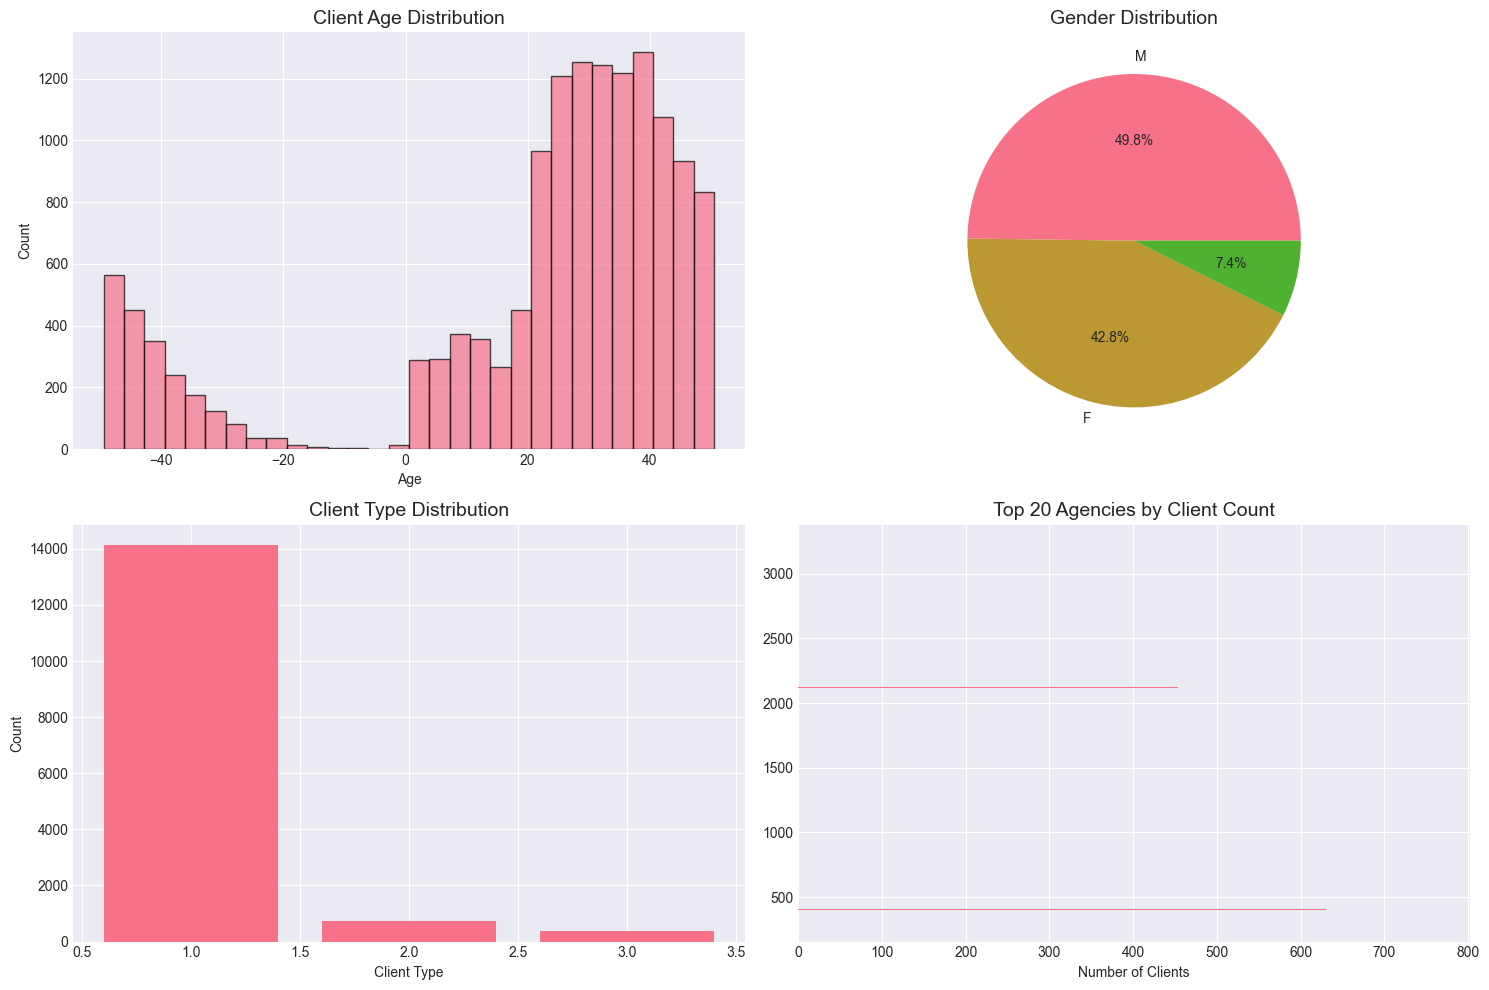


=== PRODUCTS DATA ===
Shape: (63563, 7)

Product Status Distribution:
ETA
VA    63389
AT      174
Name: count, dtype: int64

Average products per client: 4.42
Max products per client: 57


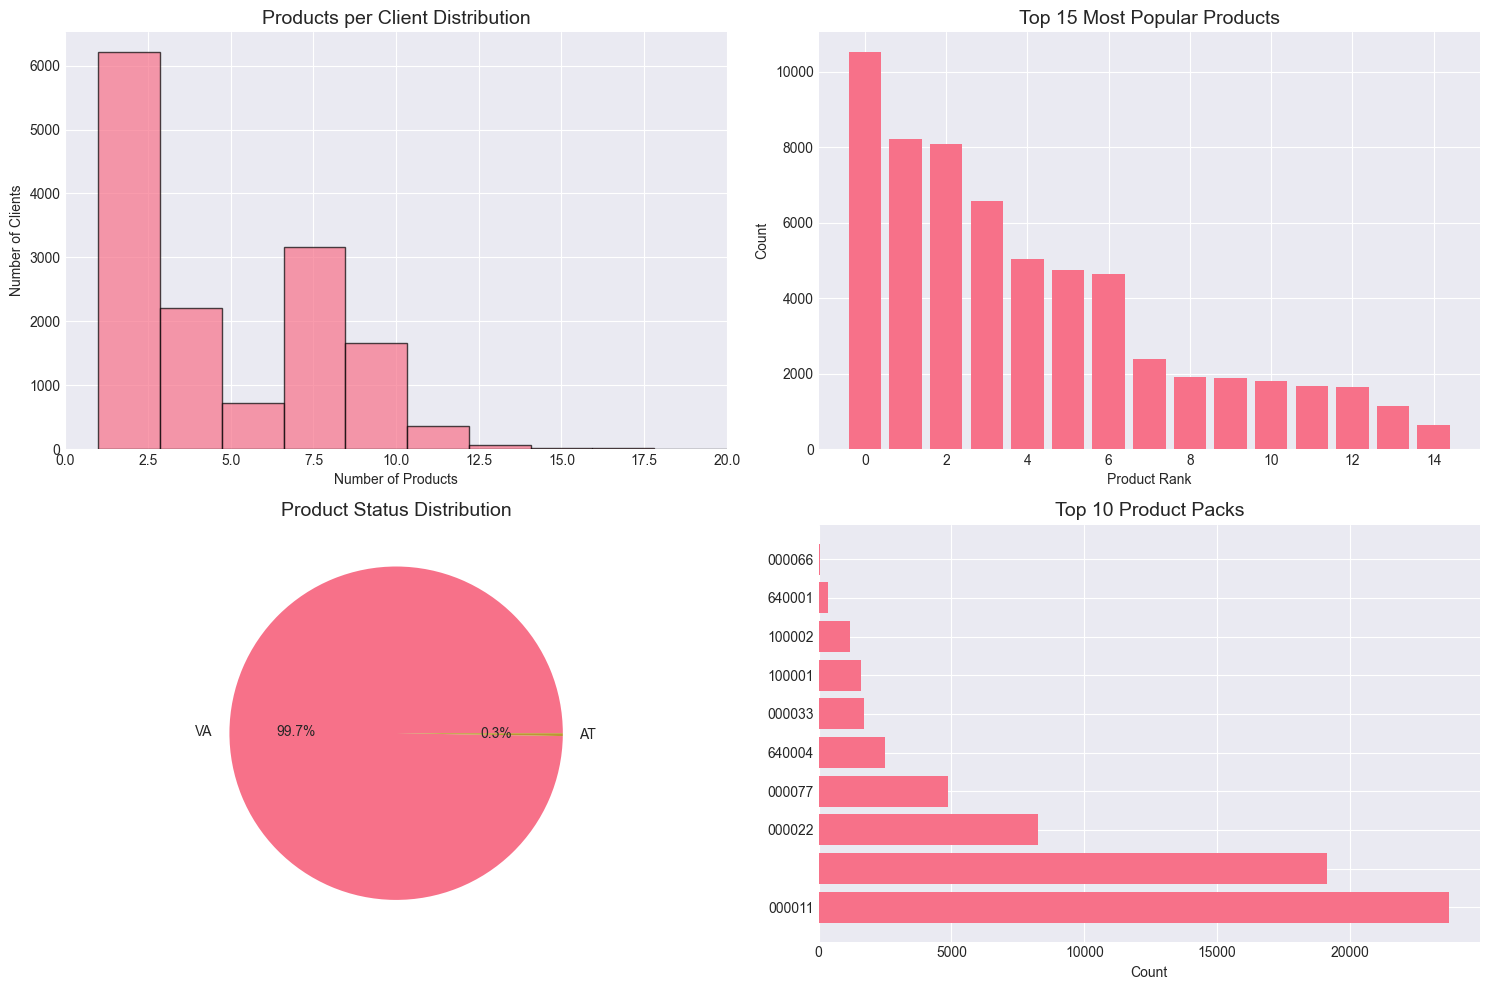


=== MANAGER ANALYSIS ===
Average clients per manager: 116.60
Max clients per manager: 372

Top 10 Managers by Client Count:
GES
43     372
311    346
31     341
171    314
321    267
73     262
303    240
192    233
102    226
223    221
Name: CLI, dtype: int64


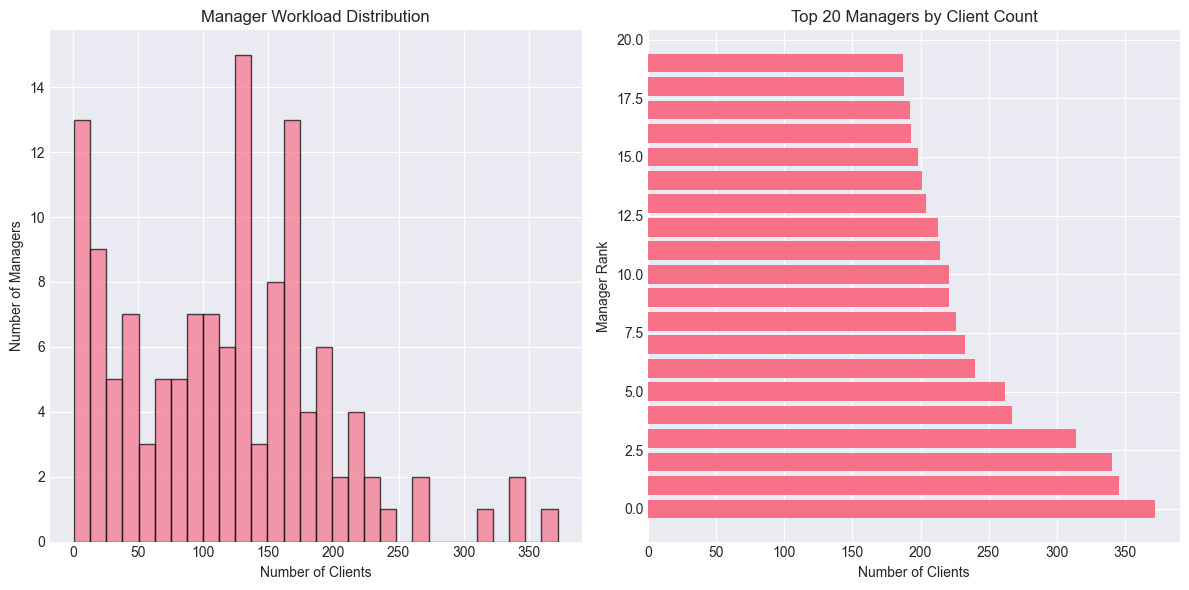


=== ACCOUNT ANALYSIS ===
Total accounts: 35239

Account Status:
CFE
N    33064
O     2175
Name: count, dtype: int64

Average accounts per client: 2.45

Account Types:
TYP
999    15368
1      10507
8       7952
7        706
9        385
3         81
27        46
31        27
10        27
20        26
2         24
28        21
32        19
29        18
33        14
37         7
46         2
35         2
13         2
21         2
19         1
38         1
45         1
Name: count, dtype: int64

=== EERP SEGMENTATION ===
Client Segments:
Segment Client
ADULTES GRAND PUBLIC      13185
JUNIOR                     1965
NON AFFECTE                1873
JEUNES ADULTES             1484
ADULTES CLASSE MOYENNE      780
ADULTES HAUTE GAMME         602
TRES PETITE ENTREPRISE      576
PREMIUMS ELITE              268
PREMIUMS FIRST              251
PETITE ENTREPRISE           186
MOYENNE ENTREPRISE           41
GRANDE ENTREPRISE            29
ASSOCIATION                   3
INSTITUONNEL                

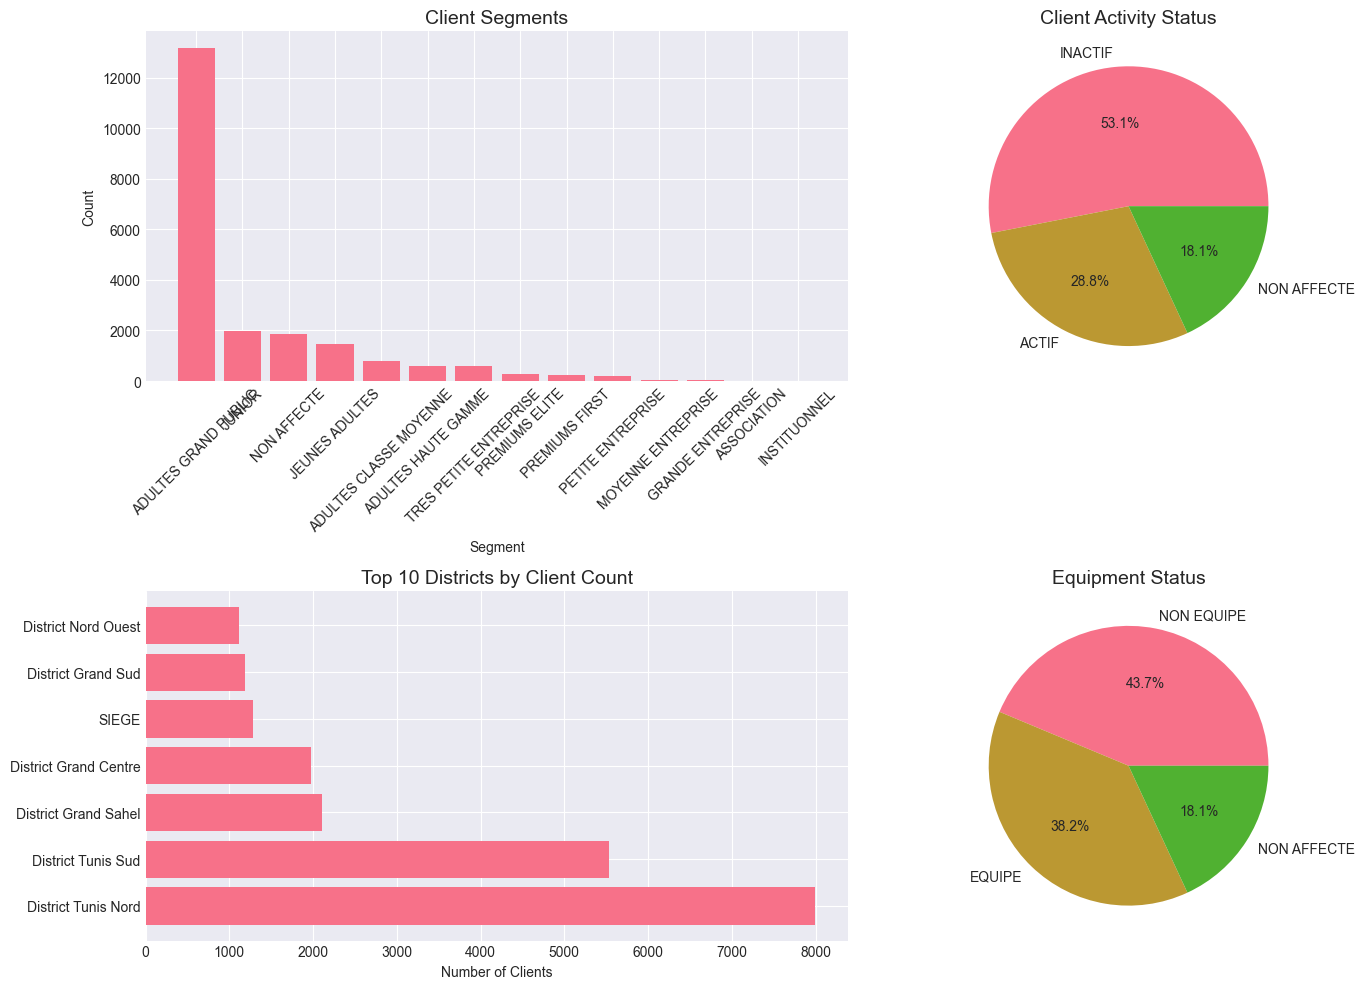


KEY INSIGHTS SUMMARY

1. CLIENT DEMOGRAPHICS:
   - Total clients: 15,274
   - Average age: 20.4 years
   - Gender distribution: {'M': 7605, 'F': 6543, ' ': 1126}

2. PRODUCT INSIGHTS:
   - Total products: 63,563
   - Average products per client: 4.42
   - Active product ratio: 99.73%

3. MANAGER PERFORMANCE:
   - Total managers: 131
   - Average clients per manager: 116.6
   - Manager workload std: 78.1

4. ACCOUNT INSIGHTS:
   - Total accounts: 35,239
   - Open accounts ratio: 93.83%
   - Average accounts per client: 2.45

5. SEGMENTATION:
   - Number of segments: 14
   - Number of districts: 7
   - Active client ratio: 81.91%

DATA QUALITY REPORT

AGENCES:
  - Shape: (87, 2)
  - Missing values: 0
  - Duplicate rows: 0
  - Memory usage: 0.00 MB

CLIENTS:
  - Shape: (15274, 9)
  - Missing values: 2252
  - Duplicate rows: 0
  - Memory usage: 1.05 MB

COMPTES:
  - Shape: (35239, 6)
  - Missing values: 33064
  - Duplicate rows: 2174
  - Memory usage: 1.61 MB

PRODUITS:
  - Shape: (63563,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# %% [markdown]
# # Banking Data Exploration
# 
# This notebook explores the banking dataset to understand:
# - Data quality and missing values
# - Statistical distributions
# - Relationships between features
# - Key insights for ML modeling

# %% Load Data
print("Loading data files...")

# Define file paths
data_path = '../data/raw/'
files = {
    'agences': 'agences.xlsx',
    'clients': 'Clients_DOU_replaced_DDMMYYYY.xlsx',
    'comptes': 'Comptes_DFE_replaced_DDMMYYYY.xlsx',
    'produits': 'Produits_DFSOU_replaced_DDMMYYYY.xlsx',
    'eerp': 'eerp_formatted_eer_sortie.xlsx',
    'gestionnaires': 'gestionnaires.xlsx'
}

# Load all datasets
data = {}
for key, filename in files.items():
    data[key] = pd.read_excel(data_path + filename)
    print(f"{key}: {data[key].shape}")

# %% Data Overview
print("\n=== CLIENTS DATA ===")
print(f"Shape: {data['clients'].shape}")
print(f"Columns: {list(data['clients'].columns)}")
print("\nFirst 5 rows:")
print(data['clients'].head())

print("\n=== DATA TYPES ===")
print(data['clients'].dtypes)

print("\n=== MISSING VALUES ===")
print(data['clients'].isnull().sum())

# %% Client Demographics Analysis
# Convert date columns
data['clients']['DNA'] = pd.to_datetime(data['clients']['DNA'], format='%d/%m/%Y', errors='coerce')
data['clients']['DOU'] = pd.to_datetime(data['clients']['DOU'], format='%d/%m/%Y', errors='coerce')

# Calculate age
data['clients']['age'] = (datetime.now() - data['clients']['DNA']).dt.days / 365.25

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0, 0].hist(data['clients']['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Client Age Distribution', fontsize=14)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Gender distribution
gender_counts = data['clients']['SEXT'].value_counts()
axes[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Gender Distribution', fontsize=14)

# Client type distribution
client_type_counts = data['clients']['TCLI'].value_counts()
axes[1, 0].bar(client_type_counts.index, client_type_counts.values)
axes[1, 0].set_title('Client Type Distribution', fontsize=14)
axes[1, 0].set_xlabel('Client Type')
axes[1, 0].set_ylabel('Count')

# Clients per agency
agency_counts = data['clients']['AGE'].value_counts().head(20)
axes[1, 1].barh(agency_counts.index, agency_counts.values)
axes[1, 1].set_title('Top 20 Agencies by Client Count', fontsize=14)
axes[1, 1].set_xlabel('Number of Clients')

plt.tight_layout()
plt.show()

# %% Product Analysis
print("\n=== PRODUCTS DATA ===")
print(f"Shape: {data['produits'].shape}")

# Convert dates
data['produits']['DDSOU'] = pd.to_datetime(data['produits']['DDSOU'], format='%d/%m/%Y', errors='coerce')
data['produits']['DFSOU'] = pd.to_datetime(data['produits']['DFSOU'], format='%d/%m/%Y', errors='coerce')

# Product status
product_status = data['produits']['ETA'].value_counts()
print("\nProduct Status Distribution:")
print(product_status)

# Products per client
products_per_client = data['produits'].groupby('CLI')['CPRO'].count()
print(f"\nAverage products per client: {products_per_client.mean():.2f}")
print(f"Max products per client: {products_per_client.max()}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Products per client distribution
axes[0, 0].hist(products_per_client.values, bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Products per Client Distribution', fontsize=14)
axes[0, 0].set_xlabel('Number of Products')
axes[0, 0].set_ylabel('Number of Clients')
axes[0, 0].set_xlim(0, 20)

# Top products
top_products = data['produits']['CPRO'].value_counts().head(15)
axes[0, 1].bar(range(len(top_products)), top_products.values)
axes[0, 1].set_title('Top 15 Most Popular Products', fontsize=14)
axes[0, 1].set_xlabel('Product Rank')
axes[0, 1].set_ylabel('Count')

# Product status pie chart
axes[1, 0].pie(product_status.values, labels=product_status.index, autopct='%1.1f%%')
axes[1, 0].set_title('Product Status Distribution', fontsize=14)

# Pack distribution
pack_counts = data['produits']['CPACK'].value_counts().head(10)
axes[1, 1].barh(pack_counts.index, pack_counts.values)
axes[1, 1].set_title('Top 10 Product Packs', fontsize=14)
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# %% Manager Performance Analysis
print("\n=== MANAGER ANALYSIS ===")

# Clients per manager
clients_per_manager = data['clients'].groupby('GES')['CLI'].count().sort_values(ascending=False)
print(f"Average clients per manager: {clients_per_manager.mean():.2f}")
print(f"Max clients per manager: {clients_per_manager.max()}")

# Top managers
print("\nTop 10 Managers by Client Count:")
print(clients_per_manager.head(10))

# Manager workload distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(clients_per_manager.values, bins=30, edgecolor='black', alpha=0.7)
plt.title('Manager Workload Distribution')
plt.xlabel('Number of Clients')
plt.ylabel('Number of Managers')

plt.subplot(1, 2, 2)
top_managers = clients_per_manager.head(20)
plt.barh(range(len(top_managers)), top_managers.values)
plt.title('Top 20 Managers by Client Count')
plt.xlabel('Number of Clients')
plt.ylabel('Manager Rank')

plt.tight_layout()
plt.show()

# %% Account Analysis
print("\n=== ACCOUNT ANALYSIS ===")
print(f"Total accounts: {len(data['comptes'])}")

# Account status
account_status = data['comptes']['CFE'].value_counts()
print("\nAccount Status:")
print(account_status)

# Accounts per client
accounts_per_client = data['comptes'].groupby('CLI')['CHA'].count()
print(f"\nAverage accounts per client: {accounts_per_client.mean():.2f}")

# Account types
account_types = data['comptes']['TYP'].value_counts()
print("\nAccount Types:")
print(account_types)

# %% EERP Segmentation Analysis
print("\n=== EERP SEGMENTATION ===")

# Segment distribution
eerp_segments = data['eerp']['Segment Client'].value_counts()
print("Client Segments:")
print(eerp_segments)

# Activity status
activity_status = data['eerp']['Actif/Inactif'].value_counts()
print("\nActivity Status:")
print(activity_status)

# District distribution
districts = data['eerp']['District'].value_counts()
print("\nDistrict Distribution:")
print(districts)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Client segments
axes[0, 0].bar(eerp_segments.index, eerp_segments.values)
axes[0, 0].set_title('Client Segments', fontsize=14)
axes[0, 0].set_xlabel('Segment')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Activity status
axes[0, 1].pie(activity_status.values, labels=activity_status.index, autopct='%1.1f%%')
axes[0, 1].set_title('Client Activity Status', fontsize=14)

# District distribution
axes[1, 0].barh(districts.index[:10], districts.values[:10])
axes[1, 0].set_title('Top 10 Districts by Client Count', fontsize=14)
axes[1, 0].set_xlabel('Number of Clients')

# Equipment status
equipment_status = data['eerp']['Equipé/NonEquipé'].value_counts()
axes[1, 1].pie(equipment_status.values, labels=equipment_status.index, autopct='%1.1f%%')
axes[1, 1].set_title('Equipment Status', fontsize=14)

plt.tight_layout()
plt.show()

# %% Key Insights Summary
print("\n" + "="*50)
print("KEY INSIGHTS SUMMARY")
print("="*50)

print("\n1. CLIENT DEMOGRAPHICS:")
print(f"   - Total clients: {len(data['clients']):,}")
print(f"   - Average age: {data['clients']['age'].mean():.1f} years")
print(f"   - Gender distribution: {data['clients']['SEXT'].value_counts().to_dict()}")

print("\n2. PRODUCT INSIGHTS:")
print(f"   - Total products: {len(data['produits']):,}")
print(f"   - Average products per client: {products_per_client.mean():.2f}")
print(f"   - Active product ratio: {(data['produits']['ETA'] == 'VA').mean():.2%}")

print("\n3. MANAGER PERFORMANCE:")
print(f"   - Total managers: {len(clients_per_manager)}")
print(f"   - Average clients per manager: {clients_per_manager.mean():.1f}")
print(f"   - Manager workload std: {clients_per_manager.std():.1f}")

print("\n4. ACCOUNT INSIGHTS:")
print(f"   - Total accounts: {len(data['comptes']):,}")
print(f"   - Open accounts ratio: {(data['comptes']['CFE'] == 'N').mean():.2%}")
print(f"   - Average accounts per client: {accounts_per_client.mean():.2f}")

print("\n5. SEGMENTATION:")
print(f"   - Number of segments: {len(eerp_segments)}")
print(f"   - Number of districts: {len(districts)}")
print(f"   - Active client ratio: {(data['eerp']['Actif/Inactif'] != 'NON AFFECTE').mean():.2%}")

# %% Data Quality Report
print("\n" + "="*50)
print("DATA QUALITY REPORT")
print("="*50)

for name, df in data.items():
    print(f"\n{name.upper()}:")
    print(f"  - Shape: {df.shape}")
    print(f"  - Missing values: {df.isnull().sum().sum()}")
    print(f"  - Duplicate rows: {df.duplicated().sum()}")
    print(f"  - Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# %% Export cleaned datasets for ML
print("\n" + "="*50)
print("EXPORTING CLEANED DATA")
print("="*50)

# Create output directory
import os
os.makedirs('../data/processed', exist_ok=True)

# Export key datasets
data['clients']['age'] = data['clients']['age']  # Include calculated age
data['clients'].to_csv('../data/processed/clients_cleaned.csv', index=False)
print("✓ Exported clients_cleaned.csv")

data['produits'].to_csv('../data/processed/products_cleaned.csv', index=False)
print("✓ Exported products_cleaned.csv")

data['comptes'].to_csv('../data/processed/accounts_cleaned.csv', index=False)
print("✓ Exported accounts_cleaned.csv")

data['eerp'].to_csv('../data/processed/eerp_cleaned.csv', index=False)
print("✓ Exported eerp_cleaned.csv")

print("\nData exploration complete! Ready for ML modeling.")